In [1]:
import os
import re
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import PIL
from tensorflow import keras
from tensorflow.keras.models import Sequential
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Renommer les sous dossiers

In [2]:
dossier_parent = "C:/Users/Oliver/Desktop/Classify-Images-Using-Deep-Learning/Images"

# Parcourir tous les sous-dossiers
for dossier in os.listdir(dossier_parent):
    chemin_dossier = os.path.join(dossier_parent, dossier)
    
    # Vérifier si le chemin est un dossier
    if os.path.isdir(chemin_dossier):
        # Extraire le nouveau nom du dossier en utilisant une expression régulière
        nouveau_nom = re.sub(r"^\w+-", "", dossier)
        
        # Renommer le dossier
        nouveau_chemin_dossier = os.path.join(dossier_parent, nouveau_nom)
        os.rename(chemin_dossier, nouveau_chemin_dossier)
        print(f"Le dossier {dossier} a été renommé en {nouveau_nom}.")

Le dossier n02085620-Chihuahua a été renommé en Chihuahua.
Le dossier n02085782-Japanese_spaniel a été renommé en Japanese_spaniel.
Le dossier n02085936-Maltese_dog a été renommé en Maltese_dog.
Le dossier n02086079-Pekinese a été renommé en Pekinese.
Le dossier n02086240-Shih-Tzu a été renommé en Shih-Tzu.
Le dossier n02086646-Blenheim_spaniel a été renommé en Blenheim_spaniel.
Le dossier n02086910-papillon a été renommé en papillon.
Le dossier n02087046-toy_terrier a été renommé en toy_terrier.
Le dossier n02087394-Rhodesian_ridgeback a été renommé en Rhodesian_ridgeback.
Le dossier n02088094-Afghan_hound a été renommé en Afghan_hound.
Le dossier n02088238-basset a été renommé en basset.
Le dossier n02088364-beagle a été renommé en beagle.
Le dossier n02088466-bloodhound a été renommé en bloodhound.
Le dossier n02088632-bluetick a été renommé en bluetick.
Le dossier n02089078-black-and-tan_coonhound a été renommé en black-and-tan_coonhound.
Le dossier n02089867-Walker_hound a été ren

# Chargement des sous dossiers

In [2]:
# Chemin vers le dossier principal contenant les images par races
dataset_dir = "C:/Users/omira/Desktop/Classify-Images-Using-Deep-Learning/Images"

# Liste des noms des sous-dossiers (races)
subdirs = os.listdir(dataset_dir)

# Dictionnaire pour stocker les images prétraitées (y compris l'augmentation) par race
preprocessed_images_by_race = {}
preprocessed_images_by_race_clean = {}
preprocessed_images_by_race_resized = {}
preprocessed_images_by_race_gray = {}
preprocessed_images_by_race_equalized = {}
preprocessed_images_by_race_normalized = {}
preprocessed_images_by_race_whitened = {}
preprocessed_images_by_filename_augmented = {}

# listes pour stocker les différentes images afin de comprendre les différentes
# étapes du processus de traitement des images
images = []
clean_images_list = []
resized_images_list = []
gray_images_list = []
equalized_images_list = []
normalized_images_list = []
whitenened_images_list = []
augmented_images = []

# Traitement des images

In [5]:
# Paramètres de data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
# Nombre d'images augmentées par image d'origine
num_augmented_images = 4

In [7]:
# Taille de redimensionnement des images
new_size = (256, 256)

In [8]:
# Parcourir les sous-dossiers et charger les images
for subdir in subdirs[:1]:
    subdir_path = os.path.join(dataset_dir, subdir)
    
    # Vérifier si le chemin est un dossier
    if os.path.isdir(subdir_path):
        
        # Parcourir les fichiers dans le sous-dossier
        for file_name in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file_name)
            
            # Charger l'image en utilisant OpenCV
            image = cv2.imread(file_path)
            
            # Vérifier si l'image est valide
            if image is not None:
                # Redimensionner l'image
                clean_images_list.append(image)
                image_resized = cv2.resize(image, new_size)
                resized_images_list.append(image_resized)
                
                # Convertir en échelle de gris
                gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
                gray_images_list.append(gray_image)
                
                # Equalisation d'histogramme
                equalized_image = cv2.equalizeHist(gray_image)
                equalized_images_list.append(equalized_image)
                
                # Normalisation
                normalized_image = equalized_image / 255.0
                normalized_images_list.append(normalized_image)
                
                # Whitening
                mean = np.mean(normalized_image)
                std = np.std(normalized_image)
                whitened_image = (normalized_image - mean) / std
                
                # Ajuster la forme de l'image pour l'augmentation des données
                whitened_image = np.expand_dims(whitened_image, axis=2)
                whitenened_images_list.append(whitened_image)
                images.append(whitened_image)
                
                # Appliquer l'augmentation de données
                for _ in range(num_augmented_images):
                    augmented_image = datagen.random_transform(whitened_image)
                    augmented_images.append(augmented_image)
                preprocessed_images_by_filename_augmented[file_name] = [image] + augmented_images
                images.extend(augmented_images)
        
        # Stocker les images prétraitées (y compris l'augmentation) dans le dictionnaire par race
        preprocessed_images_by_race[subdir] = images
        preprocessed_images_by_race_clean[subdir] = clean_images_list
        preprocessed_images_by_race_resized[subdir] = resized_images_list
        preprocessed_images_by_race_gray[subdir] = gray_images_list
        preprocessed_images_by_race_equalized[subdir] = equalized_images_list
        preprocessed_images_by_race_normalized[subdir] = normalized_images_list
        preprocessed_images_by_race_whitened[subdir] = whitenened_images_list

# Visualisation des étapes de traitement

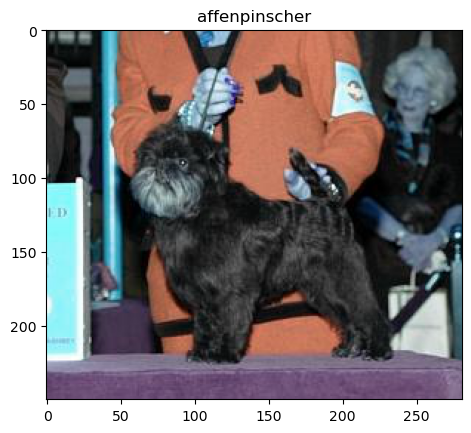

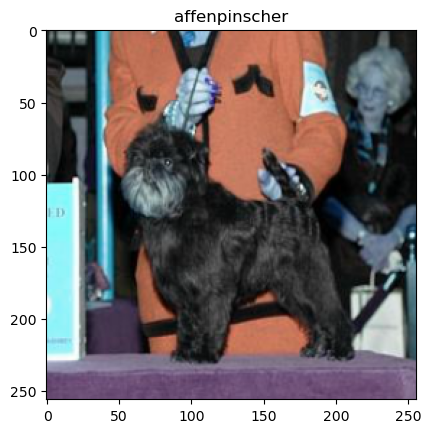

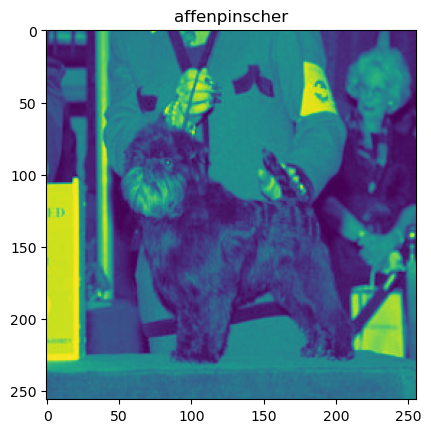

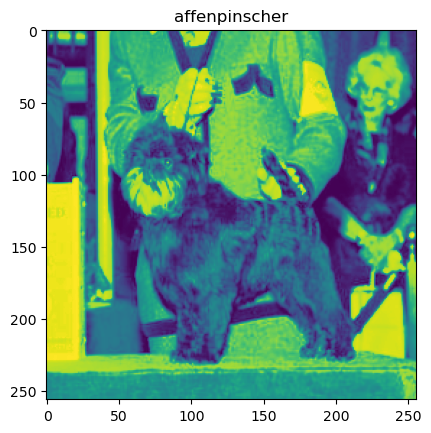

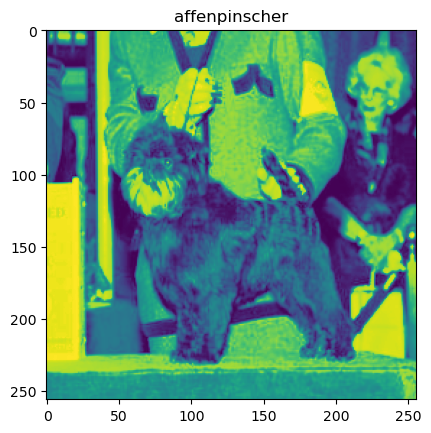

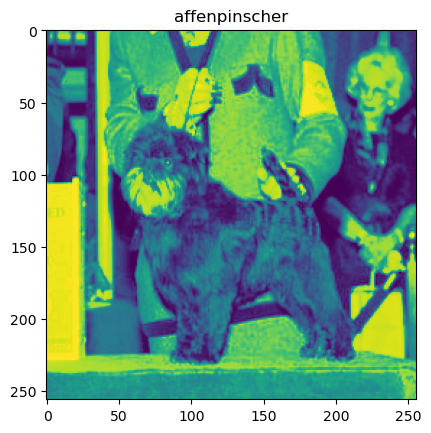

In [10]:
subdir = 'affenpinscher'

dictionaries = [preprocessed_images_by_race_clean, 
preprocessed_images_by_race_resized, preprocessed_images_by_race_gray, 
preprocessed_images_by_race_equalized, preprocessed_images_by_race_normalized, 
preprocessed_images_by_race_whitened]

for dictionary in dictionaries:
    if subdir in dictionary:
        img_list = dictionary[subdir]
        if len(img_list) > 0:
            img_test = img_list[0]
            plt.imshow(img_test)
            plt.title(subdir)
            plt.show()

# Visualisation de la data augmentation

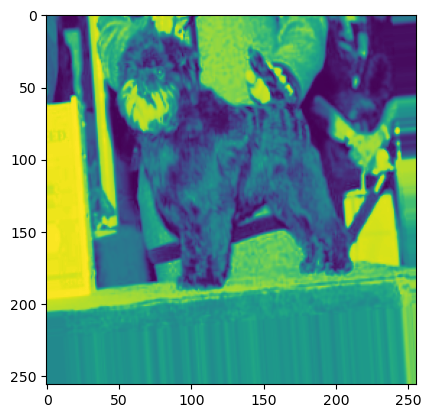

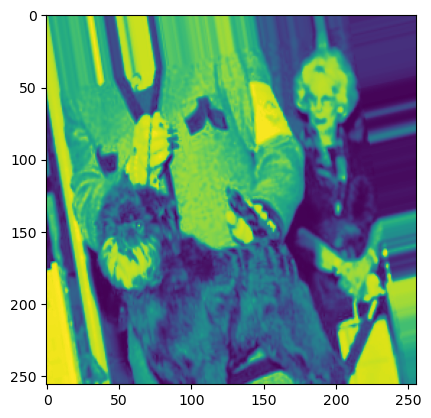

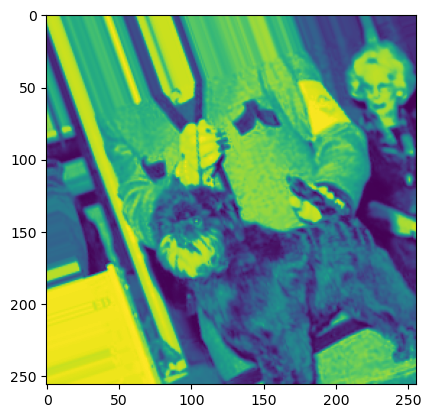

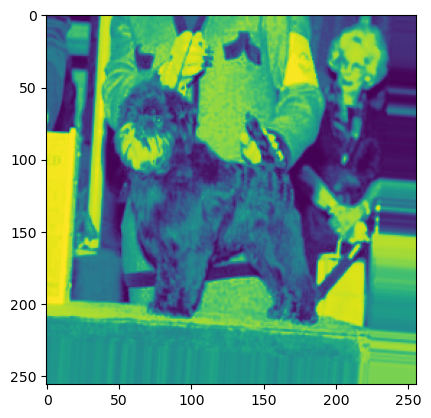

In [11]:
image_filenames = ['n02110627_10147.jpg']

for filename in image_filenames:
    for index in 1, 2, 3, 4:
        img_augmented = preprocessed_images_by_filename_augmented[filename][index]
        plt.imshow(img_augmented)
        plt.show()

# Création du modèle

## création du training set

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = (256, 256),
  batch_size = 32)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


## création du validation set

In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (256, 256),
  batch_size = 32)

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Afghan_hound', 'African_hunting_dog', 'Airedale', 'American_Staffordshire_terrier', 'Appenzeller', 'Australian_terrier', 'Bedlington_terrier', 'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie', 'Border_terrier', 'Boston_bull', 'Bouvier_des_Flandres', 'Brabancon_griffon', 'Brittany_spaniel', 'Cardigan', 'Chesapeake_Bay_retriever', 'Chihuahua', 'Dandie_Dinmont', 'Doberman', 'English_foxhound', 'English_setter', 'English_springer', 'EntleBucher', 'Eskimo_dog', 'French_bulldog', 'German_shepherd', 'German_short-haired_pointer', 'Gordon_setter', 'Great_Dane', 'Great_Pyrenees', 'Greater_Swiss_Mountain_dog', 'Ibizan_hound', 'Irish_setter', 'Irish_terrier', 'Irish_water_spaniel', 'Irish_wolfhound', 'Italian_greyhound', 'Japanese_spaniel', 'Kerry_blue_terrier', 'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa', 'Maltese_dog', 'Mexican_hairless', 'Newfoundland', 'Norfolk_terrier', 'Norwegian_elkhound', 'Norwich_terrier', 'Old_English_sheepdog', 'Pekinese', 'Pembroke', 'Po

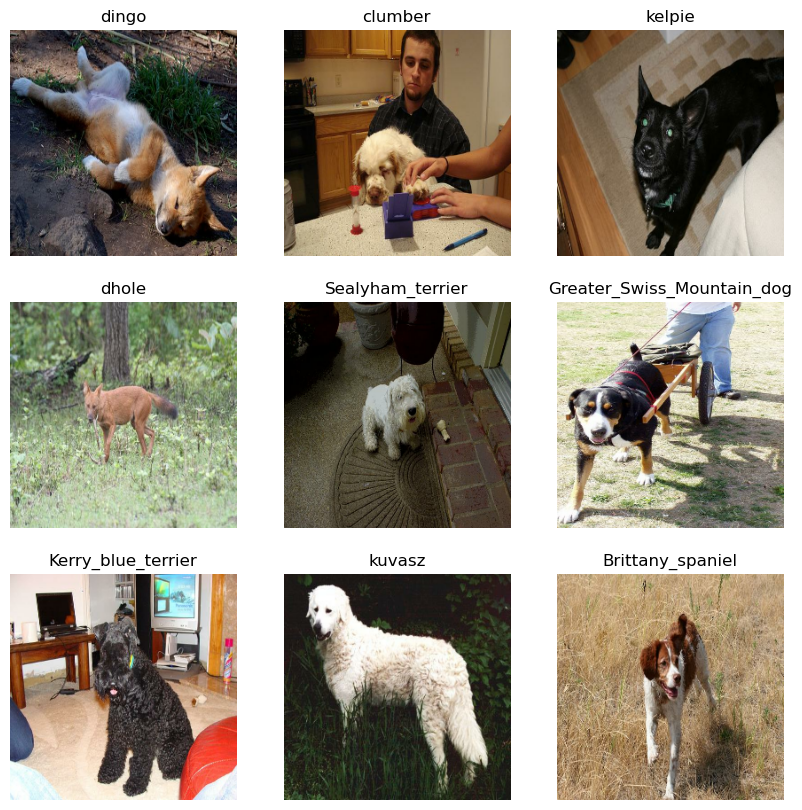

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
normalization_layer = layers.Rescaling(1./255)

In [10]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [15]:
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = 10
)

Epoch 1/10
515/515 [==============================] - 279s 537ms/step - loss: 4.7375 - accuracy: 0.0171 - val_loss: 4.5864 - val_accuracy: 0.0245
Epoch 2/10
515/515 [==============================] - 301s 581ms/step - loss: 4.3676 - accuracy: 0.0475 - val_loss: 4.2682 - val_accuracy: 0.0573
Epoch 3/10
515/515 [==============================] - 308s 595ms/step - loss: 3.9972 - accuracy: 0.0909 - val_loss: 4.1615 - val_accuracy: 0.0724
Epoch 4/10
515/515 [==============================] - 322s 622ms/step - loss: 3.3817 - accuracy: 0.1992 - val_loss: 4.4053 - val_accuracy: 0.0722
Epoch 5/10
515/515 [==============================] - 308s 595ms/step - loss: 2.2388 - accuracy: 0.4299 - val_loss: 5.2736 - val_accuracy: 0.0705
Epoch 6/10
515/515 [==============================] - 298s 577ms/step - loss: 1.0146 - accuracy: 0.7263 - val_loss: 7.7179 - val_accuracy: 0.0598
Epoch 7/10
515/515 [==============================] - 333s 645ms/step - loss: 0.3712 - accuracy: 0.9032 - val_loss: 10.2810 

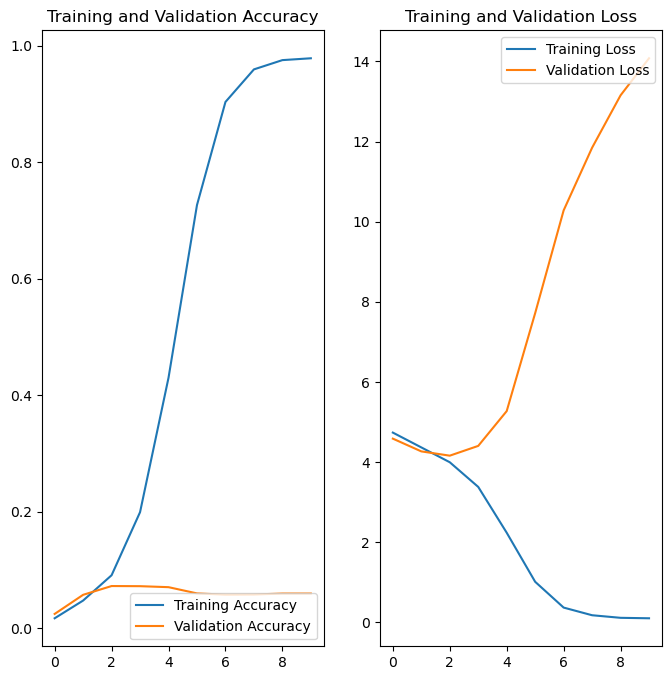

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

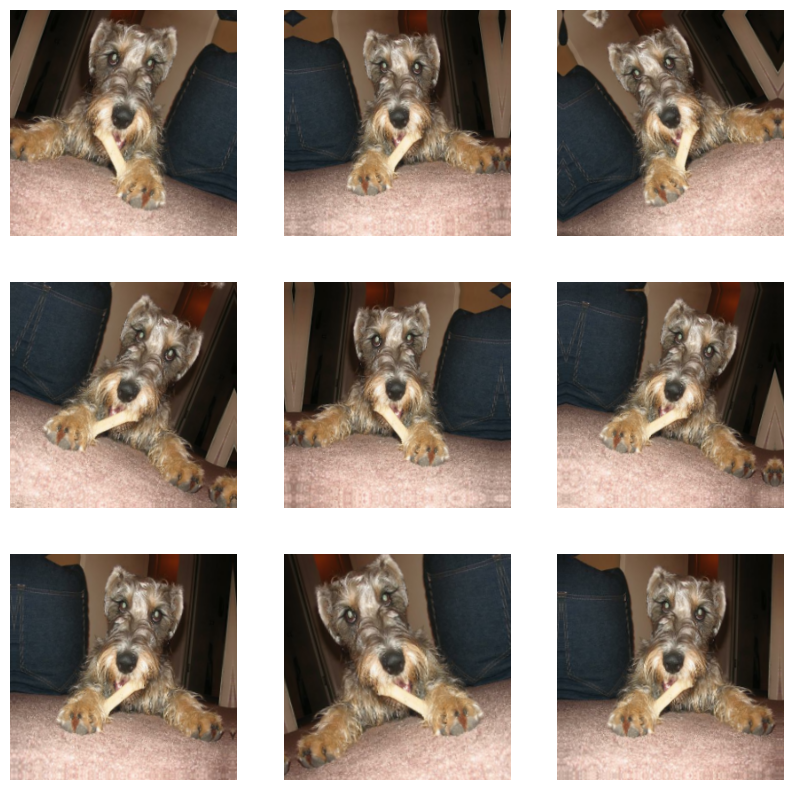

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [20]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [23]:
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = 10
)

Epoch 1/10
515/515 [==============================] - 358s 688ms/step - loss: 4.7310 - accuracy: 0.0149 - val_loss: 4.5544 - val_accuracy: 0.0272
Epoch 2/10
515/515 [==============================] - 344s 662ms/step - loss: 4.3994 - accuracy: 0.0388 - val_loss: 4.2910 - val_accuracy: 0.0496
Epoch 3/10
515/515 [==============================] - 331s 640ms/step - loss: 4.2318 - accuracy: 0.0579 - val_loss: 4.2078 - val_accuracy: 0.0598
Epoch 4/10
515/515 [==============================] - 328s 635ms/step - loss: 4.1138 - accuracy: 0.0738 - val_loss: 4.1168 - val_accuracy: 0.0680
Epoch 5/10
515/515 [==============================] - 372s 721ms/step - loss: 4.0171 - accuracy: 0.0859 - val_loss: 4.0170 - val_accuracy: 0.0836
Epoch 6/10
515/515 [==============================] - 345s 668ms/step - loss: 3.9149 - accuracy: 0.1013 - val_loss: 4.0197 - val_accuracy: 0.0931
Epoch 7/10
515/515 [==============================] - 401s 776ms/step - loss: 3.8456 - accuracy: 0.1125 - val_loss: 3.9782 -

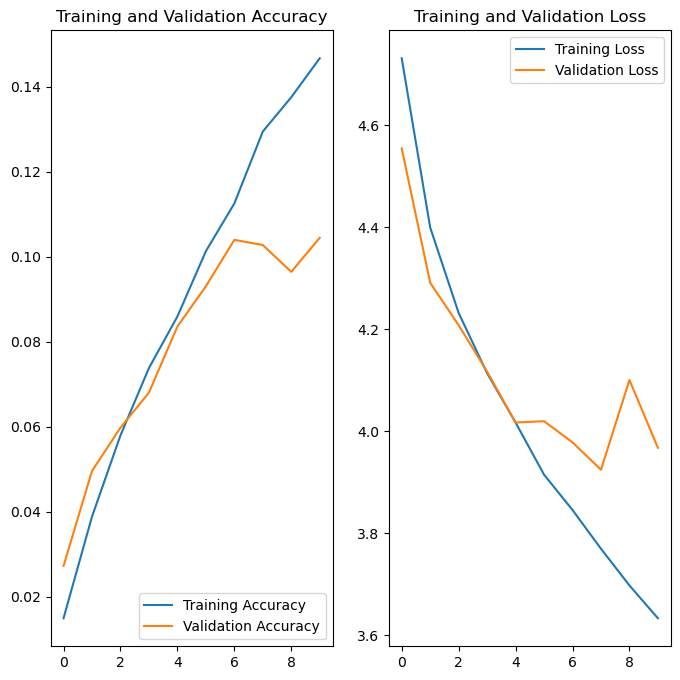

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
bull_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Bulldog_inglese.jpg/220px-Bulldog_inglese.jpg"
bull_path = tf.keras.utils.get_file('bul', origin=bull_url)

img = tf.keras.utils.load_img(
    bull_path, target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 3s 3s/step
This image most likely belongs to Blenheim_spaniel with a 27.33 percent confidence.
